# **Capstone Project Data Cleaning Process**

### ***Setting up imports***

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

### ***Creating DataFrame for Unclean CSV File***


In [3]:
df = pd.read_csv("unclean_1950-2021_all_tornadoes.csv")

### ***Naming the Index Column*** 
##### *There wasn't a column with unique values for each row so I used the default that the dataframe provides and named it "Index"

In [4]:
index_name=df.index.name
df.index.name = "Index"
df.head()


,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
Index,,,,,,,,,,,,,,,,,,,,,
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


### ***Creating New Columns***
##### *The use of "len" did not provide enough context, so I changed it to "Length in Miles" 

In [5]:
#len into Length in Miles
df["Length in Miles"] = df["len"]
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,Length in Miles
Index,,,,,,,,,,,,,,,,,,,,,
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,10,1,1,1,25,0,0,0,0,15.8
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,880,1,1,1,47,0,0,0,0,2.0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,10,1,1,1,177,0,0,0,0,0.1
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,10,1,1,1,209,0,0,0,0,0.1
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,37,1,1,1,101,0,0,0,0,2.0


### ***Reformatting Column Values***

##### *I was happy with the way the column labels looked so I did not reformat them other than capitalizing each column label when I renamed them earlier

### ***Dropping Columns***
##### *I dropped the following columns because they weren't beneficial to the analysis:
* om = Tornado number (order was not sequential)
* tz = Timezone (Most of the times were already converted into CST, with the exception of GMT)
* stf = State FIPS number 
* stn = State number (didn't use because this was discontinued in 2008, which would skew our data)
* mag = Fujita (F) Tornado Damage Scale
* wid = Width in Yards
* f1, f2, f3, f4 = Categorizations of the F-scale
* fc = F-scale rating for 2016

In [6]:
df.drop(['om','tz', 'stf', 'stn', 'mag', 'wid','f1', 'f2','f3','f4','fc'], axis = 1, inplace = True)

### ***Renaming Columns*** 
##### *To make the data much simpler to understand

In [7]:
renamed_df = df.rename(columns = {"yr": "Year", "mo":"Month", "dy": "Day","date":"Date", "time":"Time", "st":"State", "inj":"Injuries", "fat":"Fatalities", "loss":"Property Loss", "closs":"Crop Loss/Millions", "slat":"Start Latitude", "slon": "Start Longitude", "elat": "End Latitude", "elon":"End Longitude", "ns": "Number of States Affected", "sn": "State Number", "sg": "Tornado Segment Number"})
renamed_df.head()

,Year,Month,Day,Date,Time,State,Injuries,Fatalities,Property Loss,Crop Loss/Millions,Start Latitude,Start Longitude,End Latitude,End Longitude,len,Number of States Affected,State Number,Tornado Segment Number,Length in Miles
Index,,,,,,,,,,,,,,,,,,,
0,1950,10,1,1950-10-01,21:00:00,OK,0,0,4.0,0.0,36.73,-102.52,36.88,-102.3,15.8,1,1,1,15.8
1,1950,10,9,1950-10-09,02:15:00,NC,3,0,5.0,0.0,34.17,-78.60,0.00,0.0,2.0,1,1,1,2.0
2,1950,11,20,1950-11-20,02:20:00,KY,0,0,5.0,0.0,37.37,-87.20,0.00,0.0,0.1,1,1,1,0.1
3,1950,11,20,1950-11-20,04:00:00,KY,0,0,5.0,0.0,38.20,-84.50,0.00,0.0,0.1,1,1,1,0.1
4,1950,11,20,1950-11-20,07:30:00,MS,3,0,4.0,0.0,32.42,-89.13,0.00,0.0,2.0,1,1,1,2.0


### ***Dropped Column***
##### *Since the "len" column was created as the column "Length in Miles", the "len" column was dropped to avoid confusion

In [8]:
renamed_df.drop("len", axis = 1, inplace=True)

### ***Identifying & Removing Null Values***

In [9]:
#Identification
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68868 entries, 0 to 68867
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       68868 non-null  int64  
 1   Month                      68868 non-null  int64  
 2   Day                        68868 non-null  int64  
 3   Date                       68868 non-null  object 
 4   Time                       68868 non-null  object 
 5   State                      68868 non-null  object 
 6   Injuries                   68868 non-null  int64  
 7   Fatalities                 68868 non-null  int64  
 8   Property Loss              68868 non-null  float64
 9   Crop Loss/Millions         68868 non-null  float64
 10  Start Latitude             68868 non-null  float64
 11  Start Longitude            68868 non-null  float64
 12  End Latitude               68868 non-null  float64
 13  End Longitude              68868 non-null  flo

In [10]:
#Removal 
#no null values found 

### ***Identifying & Removing Outliers***

In [11]:
# No apparent outliers
# Identification
sorted_df = renamed_df.sort_values("Injuries")
sorted_df.tail()

,Year,Month,Day,Date,Time,State,Injuries,Fatalities,Property Loss,Crop Loss/Millions,Start Latitude,Start Longitude,End Latitude,End Longitude,Number of States Affected,State Number,Tornado Segment Number,Length in Miles
Index,,,,,,,,,,,,,,,,,,
15557,1974,4,3,1974-04-03,13:30:00,OH,1150,36,8.0,0.0,39.6300,-84.050,39.9200,-83.6000,1,1,1,31.30
1090,1953,6,9,1953-06-09,14:25:00,MA,1228,94,8.0,0.0,42.4700,-72.170,42.3000,-71.5200,1,1,1,34.90
56260,2011,4,27,2011-04-27,15:43:00,AL,1500,64,2450.0,0.0,33.0297,-87.935,33.6311,-86.7436,1,1,1,80.68
19850,1979,4,10,1979-04-10,17:50:00,TX,1740,42,8.0,0.0,33.8200,-98.650,34.0300,-98.1200,2,1,2,34.10
19849,1979,4,10,1979-04-10,17:50:00,TX,1740,42,8.0,0.0,33.8200,-98.650,34.1800,-97.9800,2,0,1,46.90


In [12]:
# Removal
# Nothing obvious to remove

### ***Scatter Plot to Check for Potential Outliers***

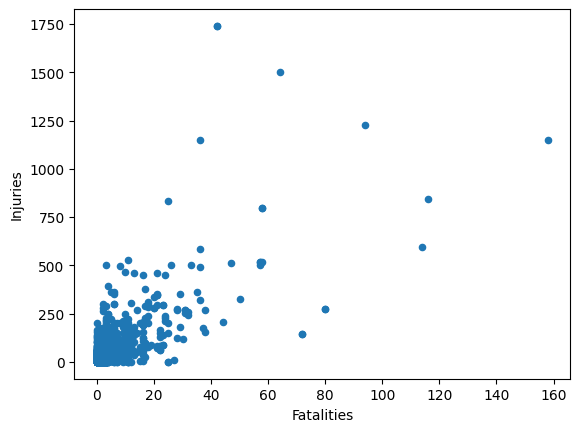

In [26]:
scatter_plot = sorted_df.plot.scatter(x="Fatalities", y="Injuries")

### ***Identifying & Removing Duplicates***

In [13]:
# Identification
sorted_df.duplicated().sort_values()

Index
0        False
9354     False
9355     False
9356     False
9358     False
         ...  
18400     True
3905      True
2213      True
23734     True
30554     True
Length: 68868, dtype: bool

In [14]:
#Removal of duplicates
sorted_df[sorted_df.duplicated()]

,Year,Month,Day,Date,Time,State,Injuries,Fatalities,Property Loss,Crop Loss/Millions,Start Latitude,Start Longitude,End Latitude,End Longitude,Number of States Affected,State Number,Tornado Segment Number,Length in Miles
Index,,,,,,,,,,,,,,,,,,
45318,2003,6,12,2003-06-12,12:56:00,TX,0,0,0.0,0.0,30.70,-94.93,30.70,-94.93,1,1,1,0.2
45400,2003,6,24,2003-06-24,18:00:00,SD,0,0,0.0,0.0,44.33,-98.18,44.33,-98.18,1,1,1,0.2
45895,2004,10,4,2004-10-04,16:44:00,CO,0,0,0.0,0.0,40.33,-104.85,40.33,-104.85,1,1,1,0.1
42830,2001,5,29,2001-05-29,12:07:00,CO,0,0,0.0,0.0,38.08,-102.67,38.08,-102.67,1,1,1,0.1
43902,2002,5,11,2002-05-11,17:25:00,KS,0,0,0.0,0.0,37.95,-98.42,37.95,-98.42,1,1,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1981,6,24,1981-06-24,13:45:00,FL,0,0,0.0,0.0,27.25,-80.95,0.00,0.00,1,1,1,0.1
31570,1992,5,15,1992-05-15,16:05:00,SD,0,0,0.0,0.0,43.95,-98.58,0.00,0.00,1,1,1,0.1
31581,1992,5,15,1992-05-15,17:28:00,NE,0,0,0.0,0.0,42.78,-98.97,0.00,0.00,1,1,1,0.5


### ***Converting Date & Time to DateTime***

In [15]:
sorted_df["Date"] = pd.to_datetime(sorted_df["Date"])
sorted_df["Time"] = pd.to_datetime(sorted_df["Time"])
sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68868 entries, 0 to 19849
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       68868 non-null  int64         
 1   Month                      68868 non-null  int64         
 2   Day                        68868 non-null  int64         
 3   Date                       68868 non-null  datetime64[ns]
 4   Time                       68868 non-null  datetime64[ns]
 5   State                      68868 non-null  object        
 6   Injuries                   68868 non-null  int64         
 7   Fatalities                 68868 non-null  int64         
 8   Property Loss              68868 non-null  float64       
 9   Crop Loss/Millions         68868 non-null  float64       
 10  Start Latitude             68868 non-null  float64       
 11  Start Longitude            68868 non-null  float64       
 12  End 

### ***Separating Time***
##### *The "Time" column had a date and a time. I needed to separate the time so I did that in the "Tornado Time" column 

In [16]:
sorted_df["Tornado Time"] = sorted_df["Time"].dt.time
sorted_df.head()

,Year,Month,Day,Date,Time,State,Injuries,Fatalities,Property Loss,Crop Loss/Millions,Start Latitude,Start Longitude,End Latitude,End Longitude,Number of States Affected,State Number,Tornado Segment Number,Length in Miles,Tornado Time
Index,,,,,,,,,,,,,,,,,,,
0,1950,10,1,1950-10-01,2023-04-13 21:00:00,OK,0,0,4.0,0.0,36.73,-102.52,36.88,-102.30,1,1,1,15.8,21:00:00
45224,2003,5,8,2003-05-08,2023-04-13 14:00:00,IL,0,0,0.0,0.0,39.02,-89.88,39.02,-89.88,1,1,1,0.2,14:00:00
45225,2003,5,8,2003-05-08,2023-04-13 14:32:00,KS,0,0,0.0,0.0,39.60,-97.87,39.60,-97.87,1,1,1,0.1,14:32:00
45226,2003,5,8,2003-05-08,2023-04-13 16:00:00,OK,0,0,0.0,0.0,35.30,-97.62,35.30,-97.62,1,1,1,0.2,16:00:00
45227,2003,5,8,2003-05-08,2023-04-13 16:04:00,OK,0,0,0.5,0.0,35.32,-97.57,35.32,-97.53,1,1,1,2.3,16:04:00


### ***Sort Date Column Into Ascending Order***

In [17]:
sorted_df.sort_values(by="Date")

,Year,Month,Day,Date,Time,State,Injuries,Fatalities,Property Loss,Crop Loss/Millions,Start Latitude,Start Longitude,End Latitude,End Longitude,Number of States Affected,State Number,Tornado Segment Number,Length in Miles,Tornado Time
Index,,,,,,,,,,,,,,,,,,,
14,1950,1,3,1950-01-03,2023-04-13 11:00:00,MO,3,0,6.0,0.0,38.7700,-90.2200,38.8300,-90.0300,2,0,1,9.50,11:00:00
15,1950,1,3,1950-01-03,2023-04-13 11:00:00,MO,3,0,6.0,0.0,38.7700,-90.2200,38.8200,-90.1200,2,1,2,6.20,11:00:00
17,1950,1,3,1950-01-03,2023-04-13 11:55:00,IL,3,0,5.0,0.0,39.1000,-89.3000,39.1200,-89.2300,1,1,1,3.60,11:55:00
16,1950,1,3,1950-01-03,2023-04-13 11:10:00,IL,0,0,5.0,0.0,38.8200,-90.1200,38.8300,-90.0300,2,1,2,3.30,11:10:00
18,1950,1,3,1950-01-03,2023-04-13 16:00:00,OH,1,0,4.0,0.0,40.8800,-84.5800,0.0000,0.0000,1,1,1,0.10,16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67906,2021,12,30,2021-12-30,2023-04-13 15:03:00,GA,0,0,100000.0,0.0,31.1703,-83.3804,31.1805,-83.3453,1,1,1,2.19,15:03:00
67905,2021,12,30,2021-12-30,2023-04-13 14:16:00,GA,0,0,100000.0,0.0,31.1087,-83.7293,31.1184,-83.6658,1,1,1,3.82,14:16:00
67909,2021,12,31,2021-12-31,2023-04-13 14:49:00,AL,0,0,0.0,0.0,34.2875,-85.7878,34.2998,-85.7805,1,1,1,0.95,14:49:00


### ***Exporting to CSV File***

In [18]:
sorted_df.to_csv("clean_1950-2021_all_tornadoes.csv",encoding="utf-8")